# Local Operations 

Local/neighborhood operators can be used to filter images in order to add soft blur, sharpen details, accentuate edges, or remove noise. Local operations are defined based on a filter/kernel. The kernel defines:

* A neighborhood (the set of "green" pixels)
* A weight associated with each pixel involved in the computation

<center>
<figure>
<img src="img/kernel.png" style="height: 200; width: 200px;"/>
    <figcaption></figcaption>
</figure>
</center>

Local operations are performed in the spatial domain of the image (the space containing the pixels)

* AKA spatial filtering
* The kernel is AKA spatial filter

### Type of filters

Depending on the processing applied to the image the filter can be:

* Linear 
* Non-linear

<center>
<figure>
<img src="img/overview.png" style="height: 800; width: 800px;"/>
    <figcaption></figcaption>
</figure>
</center>

# Linear Filters (convolution/correlation)

How is the spatial filter applied to the image? output pixel’s value is determined as a weighted sum of input pixel values

## Correlation operation

* Filter superimposed on each pixel location
* Evaluation of a weighted average
    * Pixel value
    * Filter weight

<center>
<figure>
<img src="img/correlation.png" style="height: 500; width: 500px;"/>
    <figcaption></figcaption>
</figure>
</center>

Suppose the filter dimensions are $m \times n$, where:

* $m = 2a +1$
* $n = 2b + 1$

***Correlation*** is defined as:

$$g(x,y)= \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)I(x+s,y+t)$$

The entries in the weight kernel or mask $w(s,t)$ are often called the filter coefficients. The above correlation operator can be more compactly notated as:

$$g=I\otimes w$$

A common variant on this formula is:

$$g(x,y)= \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)I(x-s,y-t)$$

where the sign of the offsets in $I$ has been reversed. This is called the ***convolution*** operator,

$$g = I * w$$

and $w$ is then called the **impulse response function**. The continuous version of ***convolution*** can be written as

$$(I*g)(t) = \int_{-\infty}^{\infty} I(\tau)g(t-\tau)d\tau$$

Both correlation and convolution are linear shift-invariant (LSI) operators, which means that he operator “behaves the same everywhere”. In the computer vision context, convolution and correlation are often used as synonims. ***Usually, correlation is evaluated but it is called convolution!***

* Filters are usually simmetric
* Filters obtained by applying convolution are called convolutional filters
* On a grayscale image the filter weights can change the image brightness
* Brightness is unchanged if: $\sum_i w_i = 1$

## Correlation vs Convolution effects 

In [37]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.ndimage import convolve
%matplotlib inline 

OpenCV provides you with the function ***filter2D***. In a nutshell, with this function, we can convolve (correlate) an image with the kernel (typically a 2d matrix) to apply a filter on the images. The following is the syntax for performing the filter operation:

`filter2D (src, dst, ddepth, kernel, anchor = cv2.Point(-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)`

where:

* src – The source image to apply the filter on
* dst – Name of the output image after applying the filter
* ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]
* kernel – The 2d matrix we want the image to convolve (correlate) with
* anchor - anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value new cv2.Point(-1, -1) means that the anchor is at the kernel center
* delta - optional value added to the filtered pixels before storing them in dst
* borderType - pixel extrapolation method
    * BORDER_CONSTANT
    * BORDER_DEFAULT
    * BORDER_REFLECT
    * BORDER_REPLICATE 
    * BORDER_WRAP
    * BORDER_ISOLATED
    



Kernel applied:
[[1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 0.]]




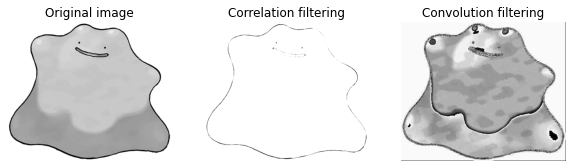

In [38]:
img = cv2.imread('ditto_gray.jpeg',0)
# plot original 
plt.figure(figsize=(10,12))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
# prepare filter
kernel = np.array([[1,1,1],[1,1,0],[1,0,0]], dtype = np.float32)
#kernel = np.ones((5,5), dtype=np.float32)
#kernel = kernel/9
print('\n')
print('Kernel applied:')
print(kernel)
print('\n')
# ----------- #
# correlation 
# ----------- #
ddepth = -1
img_corr = cv2.filter2D(img, ddepth, kernel, borderType = cv2.BORDER_DEFAULT)
plt.subplot(132)
plt.imshow(img_corr, cmap = 'gray')
plt.axis('off')
plt.title('Correlation filtering')
# ----------- #
# convolution (Setting cval=1.0 is equivalent to padding the outer edge of input with 1.0’s (and then extracting only the original region of the result).)
# ----------- #
img_conv  = convolve(img, kernel, mode='constant', cval=1.0)
plt.subplot(133)
plt.imshow(img_conv, cmap = 'gray')
plt.axis('off')
plt.title('Convolution filtering')
plt.show()

## Smoothing

### Identity filter

**Recap**: a convolution (correlation) kernel is a 2D matrix that is used to filter images. Also known as a convolution matrix, a convolution (correlation) kernel is typically a square, MxM matrix, where M is an odd integers (e.g. 3×3, 5×5, 7×7, $\dots$).


Before we describe how to implement blurring and sharpening kernels, let’s first learn about the identity kernel. The identity kernel is a square matrix, where the middle element is 1, and all other elements are zero, as shown below.

$$K = \begin{bmatrix} 0 & 0 & 0 \\ 0 & [1] & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

What makes an identity matrix special is that multiplying it with any other matrix will return the original matrix.

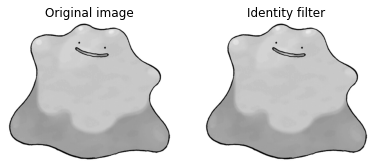

In [39]:
img = cv2.imread('ditto_gray.jpeg',0)
# plot original 
plt.figure(figsize=(10,12))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
# ----------- #
# identity filter 
# ----------- #
kernel = np.array([[0,0,0],[0,1,0],[0,0,0]], dtype = np.float32)
ddepth = -1
img_corr = cv2.filter2D(img, ddepth, kernel, borderType = cv2.BORDER_DEFAULT)
plt.subplot(132)
plt.imshow(img_corr, cmap = 'gray')
plt.axis('off')
plt.title('Identity filter')
plt.show()

### Averaging filter 

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. The following are examples of the kernel for implementing an averaging filter: 

$$K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 
                                  1 & [1] & 1 \\
                                  1 & 1 & 1 \end{bmatrix},$$
                                  
                               
$$K = \frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 
                                  2 & [4] & 2 \\
                                  1 & 2 & 1 \end{bmatrix},$$
                                  
                                  
$$K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1\\ 
                                   1 & 1 & 1 & 1 & 1\\ 
                                   1 & 1 & [1] & 1 & 1\\ 
                                   1 & 1 & 1 & 1 & 1\\ 
                                   1 & 1 & 1 & 1 & 1\end{bmatrix}\dots$$            
                                   
In OpenCV you can implement the averaging filter in three ways:

* creating a kernel and applying it with the ***cv2.filter2D*** function
* with the ***cv2.blur*** function
* with the ***cv2.boxFilter*** function


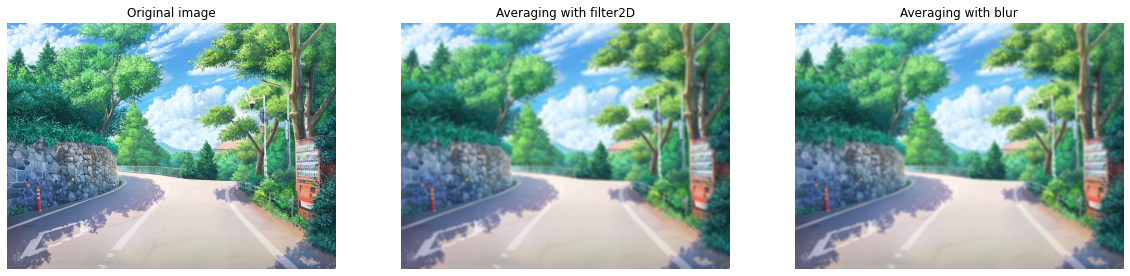

In [40]:
img = cv2.imread('img/landscape.jpg',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot original 
plt.figure(figsize=(20,24))
plt.subplot(131)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original image')
# dimension of kernel 
dim_kernel = 7
# --------------- #
# averaging with filter2D function
# --------------- #
kernel = np.ones((dim_kernel,dim_kernel), dtype=np.float32)
kernel = kernel/dim_kernel ** 2
ddepth = -1
img_corr = cv2.filter2D(img_rgb, ddepth, kernel, borderType = cv2.BORDER_REFLECT)
plt.subplot(132)
plt.imshow(img_corr)
plt.axis('off')
plt.title('Averaging with filter2D')
# --------------- #
# blur function
# --------------- #
img_blur = cv2.blur(img_rgb,(dim_kernel,dim_kernel))
plt.subplot(133)
plt.imshow(img_blur)
plt.axis('off')
plt.title('Averaging with blur')
plt.show()

#### Other types of kernels for averaging (blur) filter

In the previous examples, we always used a 2D kernel for applying the averaging filter. But we can construct a "single row" kernel to define alternative blur on the image. In particular, we can define kernel for:

* Horizontal convolution (correlation)

$$K = \frac{1}{5}\begin{bmatrix} 1 & 1 & [1] & 1 & 1 \end{bmatrix}$$

* Vertical convolution (correlation)

$$K = \frac{1}{5}\begin{bmatrix} 1 \\ 1 \\ [1] \\ 1 \\ 1 \end{bmatrix}$$

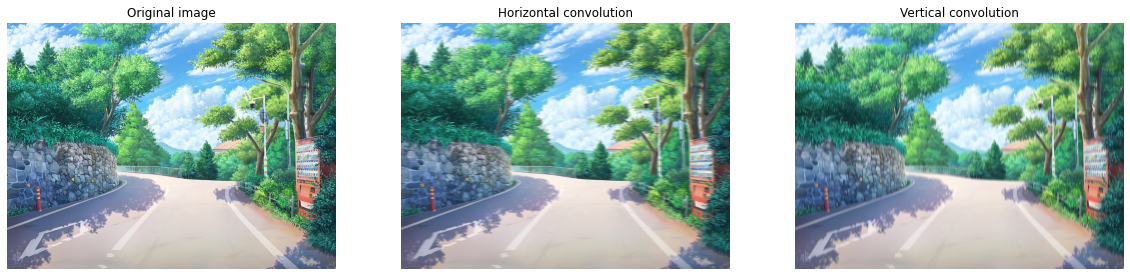

In [41]:
img = cv2.imread('img/landscape.jpg',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot original 
plt.figure(figsize=(20,24))
plt.subplot(131)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original image')
# dimension of kernel 
dim_kernel = 7
# --------------- #
# Horizontal convolution
# --------------- #
img_blur = cv2.blur(img_rgb,(dim_kernel,1)) # (width and height)
plt.subplot(132)
plt.imshow(img_blur)
plt.axis('off')
plt.title('Horizontal convolution')
# --------------- #
# Vertical convolution
# --------------- #
img_blur = cv2.blur(img_rgb,(1,dim_kernel)) # (width and height)
plt.subplot(133)
plt.imshow(img_blur)
plt.axis('off')
plt.title('Vertical convolution')
plt.show()

### Gaussian Blurring

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, ***cv2.GaussianBlur()***.


`cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])`


We should specify the width and height of the kernel (ksize) which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX (the higher number of sigma, it is the higher of smoothness too). If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.


Gaussian blurring is commonly used when reducing the size of an image. When downsampling an image, it is common to apply a low-pass filter to the image prior to resampling. This is to ensure that spurious high-frequency information does not appear in the downsampled image. Gaussian blurs have nice properties, such as having no sharp edges, and thus do not introduce ringing into the filtered image.

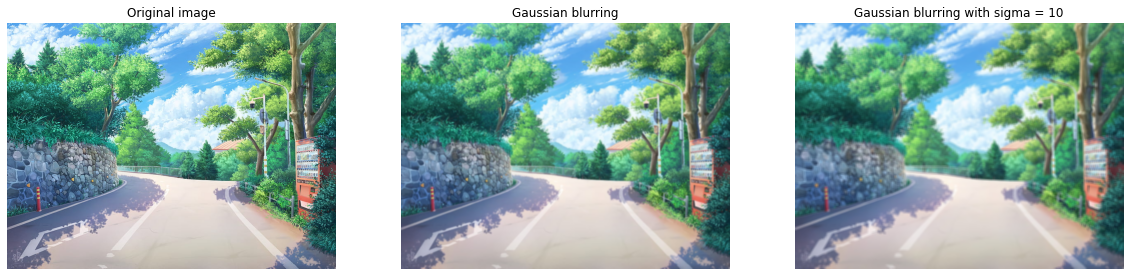

In [42]:
img = cv2.imread('img/landscape.jpg',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot original 
plt.figure(figsize=(20,24))
plt.subplot(131)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original image')
# dimension of kernel 
dim_kernel = 7
# --------------- #
# Gaussian blurring 
# --------------- #
img_gauss = cv2.GaussianBlur(img_rgb, (dim_kernel,dim_kernel), 0)
plt.subplot(132)
plt.imshow(img_gauss)
plt.axis('off')
plt.title('Gaussian blurring')
# sigma 10
img_gauss = cv2.GaussianBlur(img_rgb, (dim_kernel,dim_kernel), 10)
plt.subplot(133)
plt.imshow(img_gauss)
plt.axis('off')
plt.title('Gaussian blurring with sigma = 10')
plt.show()

## Edge Detectors

Detecting edges is one of the fundamental operations you can do in image processing. It helps you reduce the amount of data (pixels) to process and maintains the "structural" aspect of the image. We'll look at two  commonly used edge detection schemes:

* the gradient based edge detector (sobel)
* the laplacian based edge detector. 

Both of them work with convolutions and achieve the same end goal -> finding edges. All of these methods are based on derivatives, but why may be important the calculus of the derivatives in an image? You can easily notice that in an edge, the pixel intensity changes in a notorious way. A good way to express changes is by using derivatives. A high change in gradient indicates a major change in the image.

<center>
<figure>
<img src="ditto_edge.jpeg" style="height: 200; width: 200px;"/>
    <figcaption></figcaption>
</figure>
</center>

To be more graphical, let's assume we have a 1D-image. An edge is shown by the "jump" in intensity in the plot below:

<br>
<center>
<figure>
<img src="img/1d-img.png" style="height: 300; width: 300px;"/>
    <figcaption></figcaption>
</figure>
</center>

The edge "jump" can be seen more easily if we take the first derivative (actually, here appears as a maximum)

<br>
<center>
<figure>
<img src="img/1d-img-grad.png" style="height: 300; width: 300px;"/>
    <figcaption></figcaption>
</figure>
</center>

So, from the explanation above, we can deduce that a method to detect edges in an image can be performed by locating pixel locations where the gradient is higher than its neighbors (or to generalize, higher than a threshold).

### Sobel

The Sobel edge detector is a gradient based method. It works with first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes. The derivatives are only approximations (because the images are not continuous).

#### Theory behind edge detectors gradient based 

* **Derivative** of a continuous function represents the amount of change in the function (as shown in the previous examples). 
*  Taking into consideration a 2D function the **partial derivaives** represents the amount of change along each dimension. 

<br>
<center>
<figure>
<img src="img/edge.png" style="height: 300; width: 300px;"/>
    <figcaption></figcaption>
</figure>
</center>

* **Gradient** (partial derivatives) represents the direction of most rapid change in intensity

$$\nabla I =\biggl[ \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \biggr]$$


<br>
<center>
<figure>
<img src="img/edge1.png" style="height: 150; width: 150px;"/>
    <figcaption>$\nabla I =\biggl[ \frac{\partial I}{\partial x}, 0 \biggr]$</figcaption>
</figure>
</center>


<br>
<center>
<figure>
<img src="img/edge2.png" style="height: 150; width: 150px;"/>
    <figcaption>$\nabla I =\biggl[0, \frac{\partial I}{\partial y} \biggr]$</figcaption>
</figure>
</center>


<br>
<center>
<figure>
<img src="img/edge3.png" style="height: 150; width: 150px;"/>
    <figcaption>$\nabla I =\biggl[\frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \biggr]$</figcaption>
</figure>
</center>

* From this two number ($\frac{\partial I}{\partial x}, \frac{\partial I}{\partial y}$) at each pixels (or function points) you can find both the strength (magnitude) of the edge as well as the orientation of the edge.

    * **Gradient magnitude** $S = ||\nabla I|| = \sqrt{\bigl(\frac{\partial I}{\partial x}\bigr)^2 + \bigl(\frac{\partial I}{\partial y}\bigr)^2}$
    * **Gradient orientation** $\theta = tan^{-1}\bigl(\frac{\partial I}{\partial y}/\frac{\partial I}{\partial x}\bigr)$
    
That's all done in a continuous domain, how we might implement it and apply it to a discrete image? starting with the finite difference approximations for a trivial image compose by 4 pixels:

$$\begin{bmatrix} I_{i,j} & I_{i,j+1} \\ I_{i+1,j} & I_{i+1,j+1} \end{bmatrix}$$

In this case we can calculate the partial derivatives as:

$$\frac{\partial I}{\partial x} \approx \frac{1}{2\epsilon}\biggl(\bigl(  I_{i,j+1} - I_{i,j}\bigr) + (I_{i+1,j+1} - I_{i+1,j})\biggr)$$

$$\frac{\partial I}{\partial x} \approx \frac{1}{2\epsilon}\biggl(\bigl( I_{i,j} - I_{i+1,j} \bigr) + (I_{i+1,j+1} - I_{i,j+1})\biggr)$$

where $\epsilon$ represent the physical distance between the pixels ($\epsilon$ has only a scaling effect). **We can implement the calculation of partial derivatives using the convolution (correlation) operation**. 

* $\frac{\partial I}{\partial x} \approx \frac{1}{2\epsilon} \cdot \begin{bmatrix} -1 & 1 \\ -1  & 1\end{bmatrix}$
* $\frac{\partial I}{\partial y} \approx \frac{1}{2\epsilon} \cdot\begin{bmatrix} -1 & -1 \\ 1  & 1\end{bmatrix}$
 
Using this apprach a variaty of gradient operators have been proposed over the last few decades:

$$\frac{\partial I}{\partial x} \rightarrow \begin{bmatrix} 0 & 1 \\ -1  & 0\end{bmatrix},\;\;\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix},\;\;
\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1\end{bmatrix},\;\;
\begin{bmatrix} -1 & -2 & 0 & 2 & 1 \\ -2 & -3 & 0 & 3 & 2 \\ -3 & -5 & 0 & 5 & 3 \\ -2 & -3 & 0 & 3 & 2 \\ -1 & -2 & 0 & 2 & 1\end{bmatrix}$$

$$\frac{\partial I}{\partial y} \rightarrow \begin{bmatrix} -1 & 0 \\ 0  & 1\end{bmatrix},\;\;\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1\end{bmatrix},\;\;
\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1\end{bmatrix},\;\;
\begin{bmatrix} -1 & -2 & -3 & -2 & -1 \\ -2 & -3 & -5 & -3 & -2 \\ 0 & 0 & 0 & 0 & 0 \\ 2 & 3 & 5 & 3 & 2 \\ 1 & 2 & 3 & 2 & 1\end{bmatrix}$$

Respectively: Roberts, Prewitt, Sobel (3x3), Sobel (5x5).

* Small filter: 
    * **good localization**
    * noise sensitive
    * poor detection
* Larger fiter:
    * poor localization
    * **less noise sensitive**
    * **good detection**

#### Example of Sobel operation
Remember to apply the Sobel operator on grayscale images 

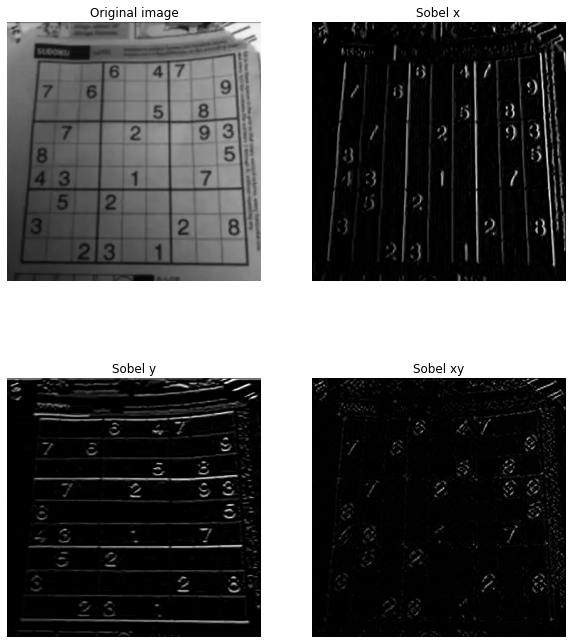

In [104]:
img = cv2.imread('img/sudoku.png',0)
# plot original 
plt.figure(figsize=(10,12))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
# sobel x 
img_sobelx = cv2.Sobel(img, ddepth=-1, dx=1, dy=0, ksize=3)
plt.subplot(222)
plt.imshow(img_sobelx, cmap = 'gray')
plt.axis('off')
plt.title('Sobel x')
# sobel y 
img_sobely = cv2.Sobel(img, ddepth=-1, dx=0, dy=1, ksize=3)
plt.subplot(223)
plt.imshow(img_sobely, cmap = 'gray')
plt.axis('off')
plt.title('Sobel y')
# sobel xy
img_sobelxy = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=3)
plt.subplot(224)
plt.imshow(img_sobelxy, cmap = 'gray')
plt.axis('off')
plt.title('Sobel xy')
plt.show()

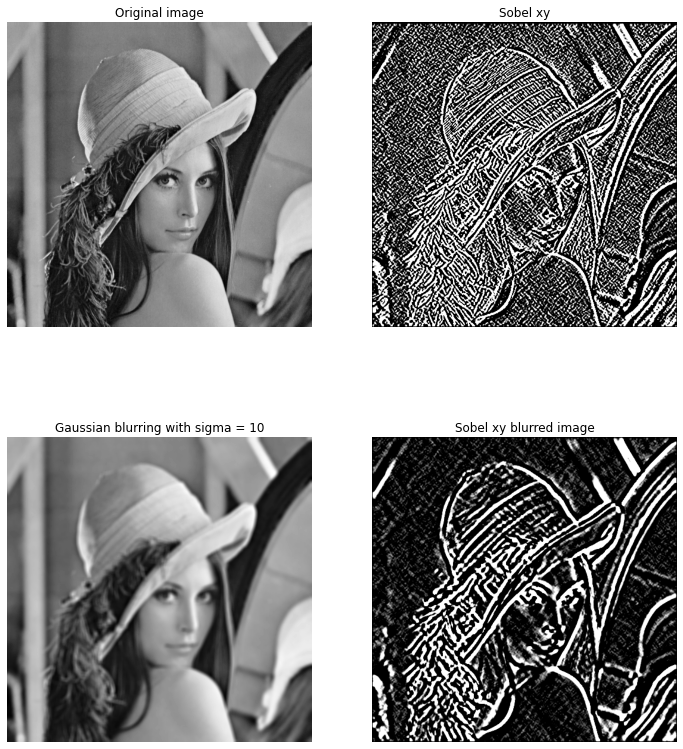

In [101]:
# sobel operator on complex image 
img = cv2.imread('img/lenna.png',0)
# plot original 
plt.figure(figsize=(12,14))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
# sobel 
img_sobelxy = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=7)
plt.subplot(222)
plt.imshow(img_sobelxy, cmap = 'gray')
plt.axis('off')
plt.title('Sobel xy')
# gaussian blurring
dim_kernel = 7
img_gauss = cv2.GaussianBlur(img, (dim_kernel,dim_kernel), 10)
plt.subplot(223)
plt.imshow(img_gauss, cmap = 'gray')
plt.axis('off')
plt.title('Gaussian blurring with sigma = 10')
# sobel 
img_sobelxy = cv2.Sobel(img_gauss, ddepth=-1, dx=1, dy=1, ksize=7)
plt.subplot(224)
plt.imshow(img_sobelxy, cmap = 'gray')
plt.axis('off')
plt.title('Sobel xy blurred image')
plt.show()

### Laplace filter
Sobel Operator is based on the fact that in the edge area, the pixel intensity shows a "jump" or a high variation of intensity. Getting the first derivative of the intensity, we observed that an edge is characterized by a maximum. What happens if we take the second derivative?

<br>
<center>
<figure>
<img src="img/1d-img-lapl.png" style="height: 300; width: 300px;"/>
    <figcaption></figcaption>
</figure>
</center>

You can observe that the second derivative is zero so, we can also use this criterion to attempt to detect edges in an image (at the edges you get very strong zero-crossing). However, note that zeros will not only appear in edges (they can actually appear in other meaningless locations); this can be solved by applying filtering where needed (threshold the zero-crossing in terms of how rapid it is).

#### Theory behind the laplace operator

* Laplacian: sum of pure second derivatives 

$$\nabla^2I=\frac{\partial^2 I}{\partial x}+\frac{\partial^2 I}{\partial y}$$

* Edges are "zero-crossing" in Laplacian of image 
* Laplacian does not provide directions of edges 


For the explanation of the **discrete Laplacian operator**, we need a 3x3 grid of pixels (because the second derivative is in terms of finite differences the difference of the differencem, so we need at least 3 pixels). 

$$\begin{bmatrix} I_{i-1,j-1} & I_{i-1,j} & I_{i-1,j+1} \\
I_{i,j-1} & I_{i,j} & I_{i,j+1} \\
I_{i+1,j-1} & I_{i+1,j} & I_{i+1,j+1}\end{bmatrix}$$

with this simple matrix, let's say we want to output of the Laplacian operator for the central pixel $I_{i,j}$

$$\frac{\partial^2 I}{\partial x} \approx \frac{1}{\epsilon}\biggl(\frac{1}{\epsilon}\bigl(I_{i,j+1}-I_{i,j}\bigr)-\frac{1}{\epsilon}\bigl(I_{i,j}-I_{i,j-1}\bigr)   \biggr) \approx \frac{1}{\epsilon^2}\bigl(I_{i,j-1}-2I_{i,j}+I_{i,j+1}\bigr)$$

$$\frac{\partial^2 I}{\partial y} \approx \frac{1}{\epsilon}\biggl(\frac{1}{\epsilon}\bigl(I_{i+1,j}-I_{i,j}\bigr)-\frac{1}{\epsilon}\bigl(I_{i,j}-I_{i-1,j}\bigr)   \biggr) \approx \frac{1}{\epsilon^2}\bigl(I_{i-1,j}-2I_{i,j}+I_{i+1,j}\bigr)$$

$$\nabla^2I=\frac{\partial^2 I}{\partial x}+\frac{\partial^2 I}{\partial y}$$

Finally the operator can be implemented in terms of convolution with the following kernel form:

$$\nabla^2 \approx \frac{1}{\epsilon^2} \begin{bmatrix}0&1&0 \\ 1&-4&1 \\ 0&1&0 \end{bmatrix}$$

the corner values of the kernel is equal to 0 because we nerver end up using the corner pixels of the original image 3x3. 

* However, there is a slight problem with this form of the kernel, we know that edges can appear in any orientation and let's say they, an edge appeared at 45 degrees, in that case we see that we haven't taken into account the distance in this diagonal direction (we have 0 at the corner of the kernel). Since we are on a discrete grid, you can modify the original filter and obtaining a filter that looks like:

$$\nabla^2 \approx \frac{1}{6\epsilon^2} \begin{bmatrix}1&4&1 \\ 4&-20&4 \\ 1&4&1 \end{bmatrix}$$

#### Example of Laplacian operator 

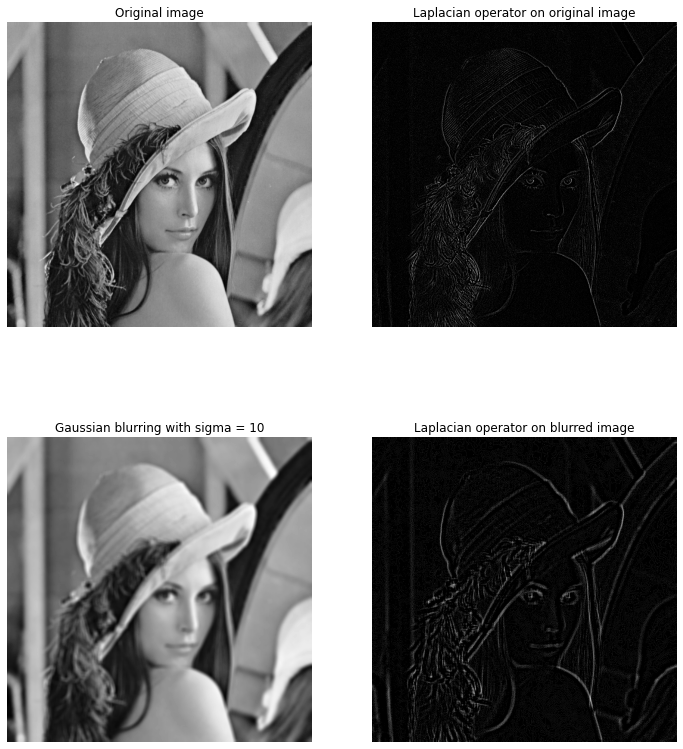

In [103]:
# sobel operator on complex image 
img = cv2.imread('img/lenna.png',0)
# plot original 
plt.figure(figsize=(12,14))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
# laplacian on original  
dim_kernel = 3
img_lapc = cv2.Laplacian(img,ddepth,(dim_kernel,dim_kernel))
plt.subplot(222)
plt.imshow(img_lapc, cmap = 'gray')
plt.axis('off')
plt.title('Laplacian operator on original image')
# gaussian blurring
dim_kernel = 7
img_gauss = cv2.GaussianBlur(img, (dim_kernel,dim_kernel), 10)
plt.subplot(223)
plt.imshow(img_gauss, cmap = 'gray')
plt.axis('off')
plt.title('Gaussian blurring with sigma = 10')
# sobel 
dim_kernel = 3
img_lapc = cv2.Laplacian(img_gauss,ddepth,(dim_kernel,dim_kernel))
plt.subplot(224)
plt.imshow(img_lapc, cmap = 'gray')
plt.axis('off')
plt.title('Laplacian operator on blurred image')
plt.show()

### Gradient vs Laplacian 

<br>
<center>
<figure>
<img src="img/pro.png" style="height: 500; width: 500px;"/>
    <figcaption></figcaption>
</figure>
</center>

# Non-lineal filters 

The idea is to replace the target pixel value with its neighbor pixels value from some ordering mechanism or function. There are many types of non-linear filters, but the main ones are the following:

* **Minimum Filter**: select the lowest pixel value from the neighbors' pixels around the target then replace it.
* **Maximum Filter**: similar to minimum filter but pick the highest one.
* **Median Filter**: selects the neighbor pixels then sort it from the lowest to highest then pick the median one to replace at the targeted pixel.

## Median Filter

OpenCV has the function for the median filter which is the ***medianBlur*** function. The function smoothes an image using the median filter with the $ksize\times ksize$ aperture. Each channel of a multi-channel image is processed independently. In-place operation is supported.

`cv2.medianBlur (src, dst, ksize)`

* src - input image
* dst - destination array of the same size and type as src.
* ksize - aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

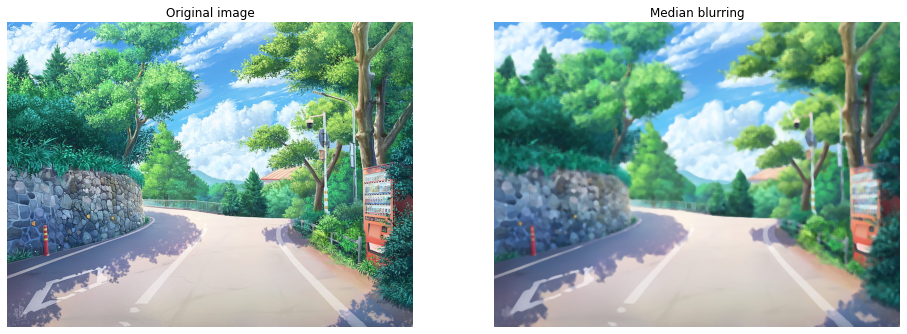

In [45]:
img = cv2.imread('img/landscape.jpg',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot original 
plt.figure(figsize=(16,18))
plt.subplot(121)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original image')
# --------------- #
# median blurring
# --------------- #
img_median = cv2.medianBlur(img_rgb, 7)
plt.subplot(122)
plt.imshow(img_median)
plt.axis('off')
plt.title('Median blurring')
plt.show()

### Image restoration example

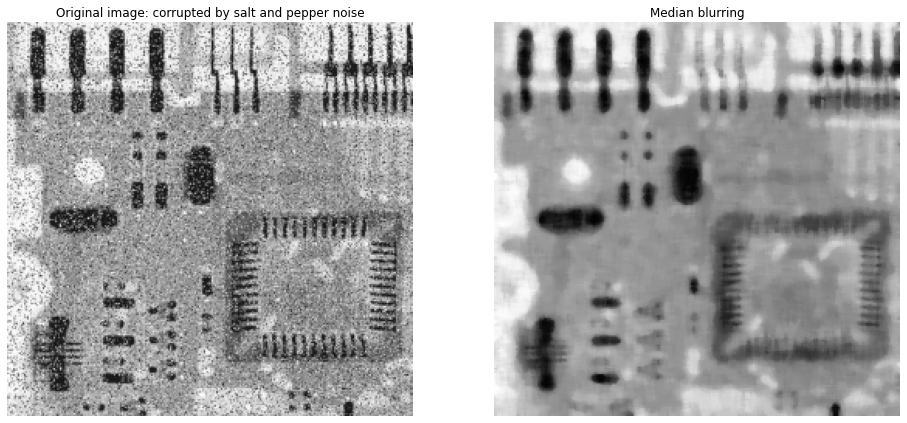

In [46]:
img = cv2.imread('img/corrupted.png',0)
# plot original 
plt.figure(figsize=(16,18))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image: corrupted by salt and pepper noise')
# --------------- #
# median blurring (restoration)
# --------------- #
img_median = cv2.medianBlur(img, 7)
plt.subplot(122)
plt.imshow(img_median, cmap = 'gray')
plt.axis('off')
plt.title('Median blurring')
plt.show()

## References 

* [Computer Vision Course by Prof. Ghidoni Stefano (Unipd)](http://www.dei.unipd.it/~ghidoni/)
* [Image Filters with Python and OpenCV](https://medium.com/nattadet-c/image-filters-41c23f09c600)
* [Computer Vision: Algorithms and Applications by Richard Szeliski](https://www.cs.ccu.edu.tw/~damon/tmp/SzeliskiBook_20100903_draft.pdf)
* [Making your own linear filters](https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html)
* [Correlation vs Convolution Filtering](https://medium.com/@aybukeyalcinerr/correlation-vs-convolution-filtering-2711d8bb3666)
* [Python OpenCV – Filter2D() Function](https://www.geeksforgeeks.org/python-opencv-filter2d-function/)
* [Scipy convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html)
* [Smoothing Images](https://docs.opencv.org/3.4/dd/d6a/tutorial_js_filtering.html)
* [Smoothing Images 2](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
* [Python OpenCV | cv2.blur() method](https://www.geeksforgeeks.org/python-opencv-cv2-blur-method/)
* [Gaussian Blur](https://en.wikipedia.org/wiki/Gaussian_blur)
* [Laplacian](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)
* [Sobel and Laplacian](https://aishack.in/tutorials/sobel-laplacian-edge-detectors/)
* [Sobel](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)